In [1]:
import math
import pandas as pd
import pip
import numpy as np
from sklearn.linear_model import LinearRegression
from statistics import mean
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split

data = arff.loadarff('p.arff')
df = pd.DataFrame(data[0])
print(df)


         V1               V2           V3            V4     V5      V6  \
0      58.0    b'management'   b'married'   b'tertiary'  b'no'  2143.0   
1      44.0    b'technician'    b'single'  b'secondary'  b'no'    29.0   
2      33.0  b'entrepreneur'   b'married'  b'secondary'  b'no'     2.0   
3      47.0   b'blue-collar'   b'married'    b'unknown'  b'no'  1506.0   
4      33.0       b'unknown'    b'single'    b'unknown'  b'no'     1.0   
...     ...              ...          ...           ...    ...     ...   
45206  51.0    b'technician'   b'married'   b'tertiary'  b'no'   825.0   
45207  71.0       b'retired'  b'divorced'    b'primary'  b'no'  1729.0   
45208  72.0       b'retired'   b'married'  b'secondary'  b'no'  5715.0   
45209  57.0   b'blue-collar'   b'married'  b'secondary'  b'no'   668.0   
45210  37.0  b'entrepreneur'   b'married'  b'secondary'  b'no'  2971.0   

           V7      V8            V9   V10     V11     V12  V13    V14   V15  \
0      b'yes'   b'no'    b'unkno

In [2]:
df=df.sample(n=10000).reset_index()

for i in range(df.shape[0]):
    if i%100 == 0:
        print(i)
    #V2
    try:
        job = [b'admin.',b'unknown',b'unemployed',b'management',b'housemaid',b'entrepreneur', b'student',b'blue-collar',b'self-employed',b'retired',b'technician',b'services']
        df.loc[i,'V2'] = job.index(df.loc[i,'V2']) + 1
    except:
        df.loc[i,'V2'] = 0
    #V3
    try:
        marital = [b'married',b'divorced',b'single']
        df.loc[i,'V3'] = marital.index(df.loc[i,'V3']) + 1
    except:
        df.loc[i,'V3'] = 0
    #V4
    try:
        education = [b'unknown',b'primary',b'secondary',b'tertiary']
        df.loc[i,'V4'] = education.index(df.loc[i,'V4']) + 1
    except:
        df.loc[i,'V4'] = 0
    #V5
    try:
        default = [b'yes',b'no']
        df.loc[i,'V5'] = default.index(df.loc[i,'V5']) + 1
    except:
        df.loc[i,'V5'] = 0
    #V7
    try:
        housing = [b'yes',b'no']
        df.loc[i,'V7'] = housing.index(df.loc[i,'V7']) + 1
    except:
        df.loc[i,'V7'] = 0
    #V8
    try:
        loan = [b'yes',b'no']
        df.loc[i,'V8'] = loan.index(df.loc[i,'V8']) + 1
    except:
        df.loc[i,'V8'] = 0
    #V9
    try:
        contact = [b'unknown',b'telephone',b'cellular']
        df.loc[i,'V9'] = contact.index(df.loc[i,'V9']) + 1
    except:
        df.loc[i,'V9'] = 0
    #V11
    try:
        month = [b'jan',b'feb',b'mar',b'apr',b'may',b'jun',b'jul',b'aug',b'sep',b'oct',b'nov',b'dec']
        df.loc[i,'V11'] = month.index(df.loc[i,'V11']) + 1
    except:
        df.loc[i,'V11'] = 0
    #V16
    try:
        poutcome = [b'unknown',b'other',b'failure',b'success']
        df.loc[i,'V16'] = poutcome.index(df.loc[i,'V16']) + 1
    except:
        df.loc[i,'V16'] = 0
    #class
    try:
        classes = [b'1',b'2']
        df.loc[i,'Class'] = classes.index(df.loc[i,'Class']) + 1
    except:
        df.loc[i,'Class'] = 0

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [3]:
df['V1'] = (df['V1'] - df['V1'].mean()) / df['V1'].std()
df['V6'] = (df['V6'] - df['V6'].mean()) / df['V6'].std()
df['V12'] = (df['V12'] - df['V12'].mean()) / df['V12'].std()
df.head(20)

,index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,10995,1.382957,8,1,3,2,0.347093,2,2,1,17.0,6,-0.330564,2.0,-1.0,0.0,1,1
1,16552,-0.660172,4,1,4,2,-0.434023,2,2,3,24.0,7,0.389059,7.0,-1.0,0.0,1,1
2,7086,-0.660172,8,1,3,2,-0.367194,1,2,1,29.0,5,-0.252344,6.0,-1.0,0.0,1,1
3,2436,-0.660172,8,1,3,2,-0.511110,1,1,1,13.0,5,0.072268,1.0,-1.0,0.0,1,1
4,39607,1.754435,4,1,4,2,6.526878,1,2,3,26.0,5,-0.275810,1.0,-1.0,0.0,1,1
5,2704,-0.753042,8,2,3,2,-0.528644,1,2,1,13.0,5,-0.721664,2.0,-1.0,0.0,1,1
6,22965,-0.195825,5,1,1,2,-0.449904,2,2,3,26.0,8,-0.647355,2.0,-1.0,0.0,1,1
7,16210,-1.310259,12,1,3,2,-0.449904,1,2,3,22.0,7,5.281715,13.0,-1.0,0.0,1,2
8,22114,1.568696,4,1,4,2,-0.354952,1,2,3,21.0,8,1.636667,8.0,-1.0,0.0,1,1
9,9289,0.547132,8,1,1,2,0.694807,1,2,1,5.0,6,0.533766,2.0,-1.0,0.0,1,1


In [73]:
x = df.loc[:,:'V16']
y = df.loc[:,'Class':]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7)

x_train=x_train.drop(columns=['index'])
x_test=x_test.drop(columns=['index'])


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


y_train=np.array(y_train).ravel()
y_train=y_train.astype('int')
y_test=np.array(y_test).ravel()
y_test=y_test.astype('int')
x_train=np.array(x_train)
x_test=np.array(x_test)


# model = LogisticRegression(solver='liblinear', C=0.04, multi_class='ovr',
#                            random_state=0)
# model.fit(x_train, y_train)

# y_pred = model.predict(x_test)
# print(y_pred)

# print(model.score(x_train, y_train))
# print(model.score(x_test, y_test))
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [132]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='tanh',alpha=0.1,max_iter=50000)
mlp.fit(x_train,y_train)
print(mlp.coefs_)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)
print(mlp.score(x_train, y_train))
print(mlp.score(x_test, y_test))
print(classification_report(y_test, , zero_division=0))

[array([[ 0.14217496, -0.12006175, -0.24011471, ...,  0.04383042,
        -0.10101358, -0.12200945],
       [-0.01124031, -0.01719434, -0.02719938, ..., -0.15458831,
         0.02429031, -0.02030043],
       [-0.03680719, -0.04208978,  0.07637254, ...,  0.01647305,
        -0.02067419,  0.11337706],
       ...,
       [-0.10212717,  0.03645836, -0.11639573, ..., -0.01171935,
        -0.12195272, -0.10277781],
       [ 0.03822508,  0.09692928, -0.02679647, ...,  0.00828528,
         0.2140746 ,  0.00917904],
       [ 0.06413016,  0.00774623, -0.04556956, ..., -0.00690202,
         0.0378908 , -0.00864723]]), array([[-5.06588079e-01],
       [ 7.81937559e-02],
       [ 1.87560160e-01],
       [-2.92381264e-01],
       [ 4.81683435e-01],
       [ 3.47378704e-01],
       [-5.51351707e-01],
       [ 4.01536520e-01],
       [ 1.15401685e-01],
       [-6.47030767e-01],
       [ 3.71828591e-04],
       [-3.16790870e-01],
       [-7.81301794e-01],
       [ 8.36984993e-01],
       [-4.57588359e-

0.9393
0.8823
///
0.9273
0.8873
///
0.9344
0.8847
///
0.9177
0.8900
///
0.8999
0.8900
///
0.8944
0.8870
///
0.8847
0.8773
///
0.8847
0.8773
///
0.8847
0.8773
///
0.8847
0.8773
///
0.8847
0.8773
///
C=10^ -1
              precision    recall  f1-score   support

           1       0.91      0.97      0.94      2632
           2       0.59      0.33      0.43       368

    accuracy                           0.89      3000
   macro avg       0.75      0.65      0.68      3000
weighted avg       0.87      0.89      0.88      3000



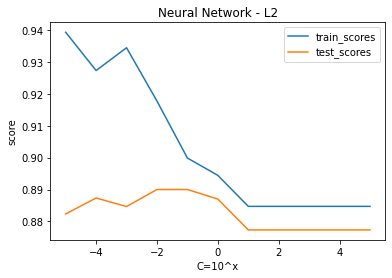

In [128]:
powers = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
best_C=0
best_model=None
best_Y_pred= 0

train_scores = []
test_scores = []
for power in powers:
    model = MLPClassifier(hidden_layer_sizes=(10),activation='logistic',alpha=10**power, max_iter=50000)
    
    model.fit(x_train, y_train)
    Y_pred = model.predict(x_test)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    try:
        if test_score >= max(test_scores):
            best_C = power
            best_model = model
            best_Y_pred = Y_pred
    except:
        best_C = power
        best_model = model
        best_Y_pred = Y_pred
    train_scores.append(train_score)
    test_scores.append(test_score)
for i in range(len(train_scores)):
    print('%.4f' % train_scores[i])
    print('%.4f' % test_scores[i])
    print('///')

print("C=10^",best_C)
print(classification_report(y_test, best_Y_pred, zero_division=0))
    
    
plt.plot(powers, train_scores, label='train_scores')
plt.plot(powers, test_scores, label='test_scores')
plt.title('Neural Network - L2')
plt.xlabel('C=10^x')
plt.ylabel('score')
plt.legend(loc='best')
plt.show()

              precision    recall  f1-score   support

           1       0.97      0.99      0.98       195
           2       0.00      0.00      0.00         5

    accuracy                           0.96       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.95      0.96      0.96       200

